# Introduction
In Part III, you merged the Intelligence x Size data with Popularity of the dog breeds over 5 years. You also performed extensive data cleaning and feature engineering.

In this final Part, you will be doing the following:
1. Import your libraries
2. Read the CSV from Part III as a DataFrame
3. Prepare your DataFrame for analysis
4. Plot graphs to investigate relationships between Intelligence, Size, and Popularity

### Step 1: Import your libraries
First of all, let's import our libraries.
1. pandas as pd
2. matplotlib.pyplot as plt
3. seaborn as sns
4. numpy as np

In [1]:
# Step 1: Import your libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Step 2: Read the CSV from Part III as a DataFrame
We will read the CSV that we exported from Part III, i.e. the CSV that contains the combined intelligence, size, and popularity of the breeds. 

Sanity check - your DataFrame should look something like this:

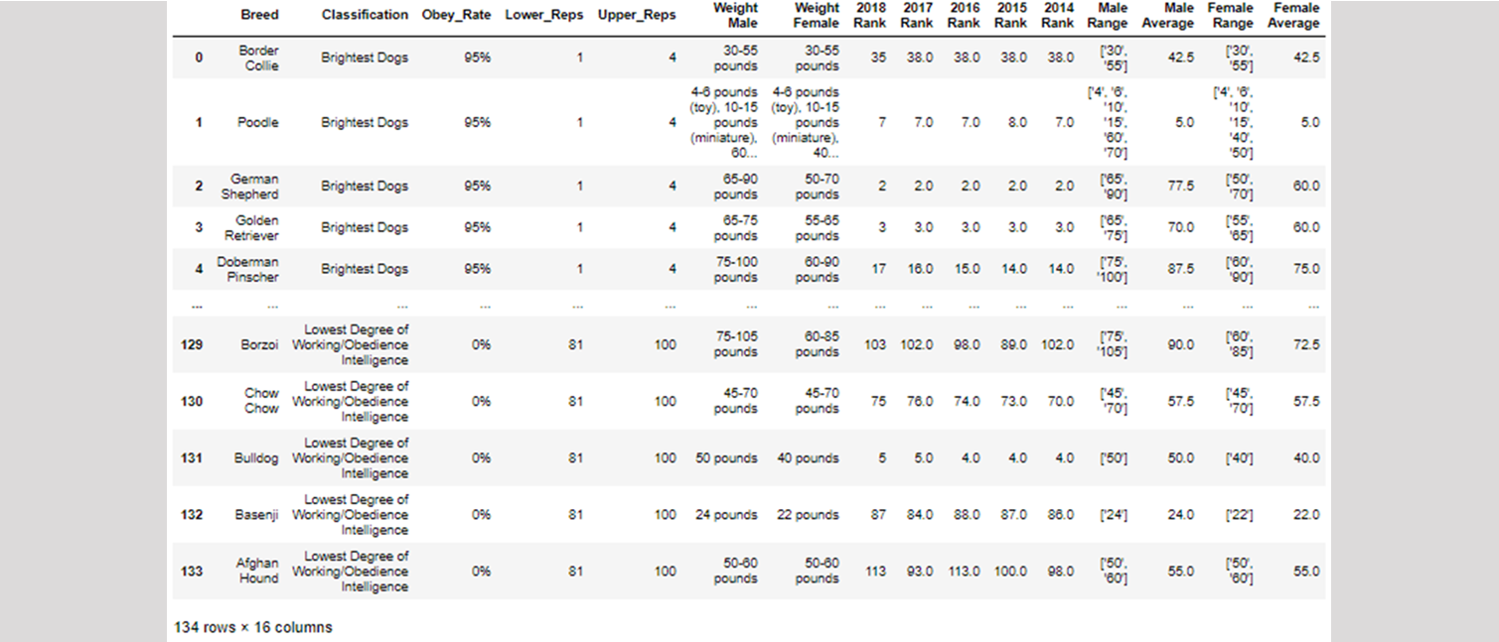

In [10]:
# Step 2: Read your CSV
M = pd.read_csv('/Users/sm/Desktop/CourseMaterials/Merged v0.3.csv')
M

,breed,classification,obey_rate,lower_reps,upper_reps,weight male,weight female,2018 rank,2017 rank,2016 rank,2015 rank,2014 rank,male range,male average,female range,female average
0,Border Collie,Brightest Dogs,95%,1,4,30-55 pounds,30-55 pounds,35,38.0,38.0,38.0,38.0,"['30', '55']",42.5,"['30', '55']",42.5
1,Poodle,Brightest Dogs,95%,1,4,"4-6 pounds (toy), 10-15 pounds (miniature), 60...","4-6 pounds (toy), 10-15 pounds (miniature), 40...",7,7.0,7.0,8.0,7.0,"['4', '6', '10', '15', '60', '70']",5.0,"['4', '6', '10', '15', '40', '50']",5.0
2,German Shepherd,Brightest Dogs,95%,1,4,110-150 pounds,80-120 pounds,2,2.0,2.0,2.0,2.0,"['110', '150']",130.0,"['80', '120']",100.0
3,Golden Retriever,Brightest Dogs,95%,1,4,65-75 pounds,55-65 pounds,3,3.0,3.0,3.0,3.0,"['65', '75']",70.0,"['55', '65']",60.0
4,Doberman Pinscher,Brightest Dogs,95%,1,4,75-100 pounds,60-90 pounds,17,16.0,15.0,14.0,14.0,"['75', '100']",87.5,"['60', '90']",75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Borzoi,Lowest Degree of Working/Obedience Intelligence,0%,81,100,75-105 pounds,60-85 pounds,103,102.0,98.0,89.0,102.0,"['75', '105']",90.0,"['60', '85']",72.5
130,Chow Chow,Lowest Degree of Working/Obedience Intelligence,0%,81,100,45-70 pounds,45-70 pounds,75,76.0,74.0,73.0,70.0,"['45', '70']",57.5,"['45', '70']",57.5
131,Bulldog,Lowest Degree of Working/Obedience Intelligence,0%,81,100,50 pounds,40 pounds,5,5.0,4.0,4.0,4.0,['50'],50.0,['40'],40.0
132,Basenji,Lowest Degree of Working/Obedience Intelligence,0%,81,100,24 pounds,22 pounds,87,84.0,88.0,87.0,86.0,['24'],24.0,['22'],22.0


### Step 3: Prepare the DataFrame for analysis
Before we continue with analyzing and visualizing the data, there's one column that we should edit first - the "Obey_Rate" column.

Currently, the values in this column are strings. Convert the values in the "Obey_Rate" column by:
1. removing the '%'
2. turning the values in the column to become integers

There are several ways to do it, but get creative!

In [11]:
# Step 3: Remove the % from Obey_Rate, and turn the values into integers
M['obey_rate']=list(map(lambda x: int(x.replace("%","")), M['obey_rate']))
M

,breed,classification,obey_rate,lower_reps,upper_reps,weight male,weight female,2018 rank,2017 rank,2016 rank,2015 rank,2014 rank,male range,male average,female range,female average
0,Border Collie,Brightest Dogs,95,1,4,30-55 pounds,30-55 pounds,35,38.0,38.0,38.0,38.0,"['30', '55']",42.5,"['30', '55']",42.5
1,Poodle,Brightest Dogs,95,1,4,"4-6 pounds (toy), 10-15 pounds (miniature), 60...","4-6 pounds (toy), 10-15 pounds (miniature), 40...",7,7.0,7.0,8.0,7.0,"['4', '6', '10', '15', '60', '70']",5.0,"['4', '6', '10', '15', '40', '50']",5.0
2,German Shepherd,Brightest Dogs,95,1,4,110-150 pounds,80-120 pounds,2,2.0,2.0,2.0,2.0,"['110', '150']",130.0,"['80', '120']",100.0
3,Golden Retriever,Brightest Dogs,95,1,4,65-75 pounds,55-65 pounds,3,3.0,3.0,3.0,3.0,"['65', '75']",70.0,"['55', '65']",60.0
4,Doberman Pinscher,Brightest Dogs,95,1,4,75-100 pounds,60-90 pounds,17,16.0,15.0,14.0,14.0,"['75', '100']",87.5,"['60', '90']",75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Borzoi,Lowest Degree of Working/Obedience Intelligence,0,81,100,75-105 pounds,60-85 pounds,103,102.0,98.0,89.0,102.0,"['75', '105']",90.0,"['60', '85']",72.5
130,Chow Chow,Lowest Degree of Working/Obedience Intelligence,0,81,100,45-70 pounds,45-70 pounds,75,76.0,74.0,73.0,70.0,"['45', '70']",57.5,"['45', '70']",57.5
131,Bulldog,Lowest Degree of Working/Obedience Intelligence,0,81,100,50 pounds,40 pounds,5,5.0,4.0,4.0,4.0,['50'],50.0,['40'],40.0
132,Basenji,Lowest Degree of Working/Obedience Intelligence,0,81,100,24 pounds,22 pounds,87,84.0,88.0,87.0,86.0,['24'],24.0,['22'],22.0


### Step 4: Get the barplot of Classification column
<blockquote>Plot me a barplot containing the frequencies of the dog classification under 'Classification'</blockquote>

For our first analysis, let's first take a look at the frequencies of the different dog classes. You can use either matplotlib or seaborn for this.

For an easier time reading the graph, go for a horizontal barplot. 

<strong>Hint: Google "counting and basic frequency plots"</strong>

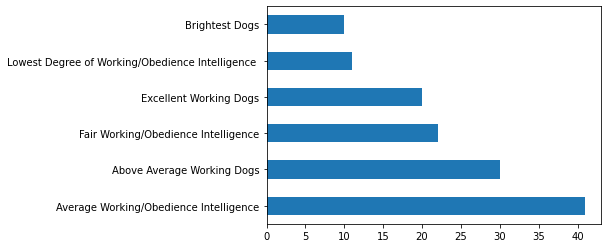

In [16]:
# Step 4: Plot a horizontal barplot
fig, ax = plt.subplots()
M['classification'].value_counts().plot(kind='barh')
plt.show()

### Step 5: Plot histograms for 'Male Average' and 'Female Average'
<blockquote>How are the weights for the male and female dogs distributed in the dataset?</blockquote>
Next, we examine what the weights for the breeds are like in the dataset. 

You will need to plot:
1. histogram for 'Male Average'
2. histogram for 'Female Average'
3. [Optional] both histograms on the same plot. Note: use the alpha parameter to make your plot transparent

After plotting, what can you say about the distribution of the weights of the dog breeds? 

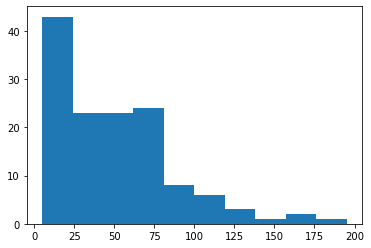

In [18]:
# Step 5a: Plot histogram for Male Average
plt.hist(M['male average'])
plt.show()

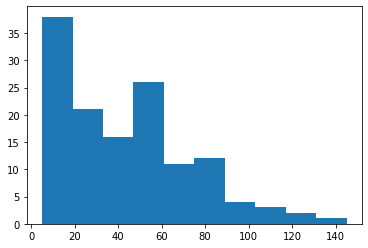

In [19]:
# Step 5b: Plot histogram for Female Average
plt.hist(M['female average'])
plt.show()

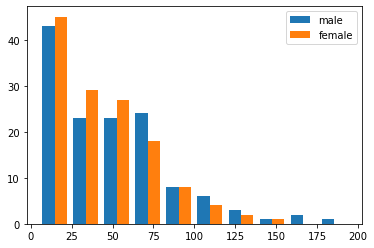

In [23]:
# Step 5c: Plot histograms for Male Average and Female Average on the same plot
plt.hist([M['male average'], M['female average']], label =['male','female'])
plt.legend(loc='upper right')
plt.show()

### Step 6: Determine the top 10 and bottom 10 popular breeds
<blockquote>"What are the most and least popular breeds?"</blockquote>
We are going to sort our DataFrame by popularity, and take a look at which are the top 10 and bottom 10 ranks. 

For simplicity, we will take 2018's rank. 

P.S. The smaller the number in the rank, the more popular it is.

In [25]:
M.columns

Index(['breed', 'classification', 'obey_rate', 'lower_reps', 'upper_reps',
       'weight male', 'weight female', '2018 rank', '2017 rank', '2016 rank',
       '2015 rank', '2014 rank', 'male range', 'male average', 'female range',
       'female average'],
      dtype='object')

In [27]:
# Step 6a: Sort your DataFrame and store it in a separate variable
M1 = M.sort_values(by = '2018 rank', ascending=True)
M1

,breed,classification,obey_rate,lower_reps,upper_reps,weight male,weight female,2018 rank,2017 rank,2016 rank,2015 rank,2014 rank,male range,male average,female range,female average
6,Labrador Retriever,Brightest Dogs,95,1,4,65-80 pounds,55-70 pounds,1,1.0,1.0,1.0,1.0,"['65', '80']",72.5,"['55', '70']",62.5
2,German Shepherd,Brightest Dogs,95,1,4,110-150 pounds,80-120 pounds,2,2.0,2.0,2.0,2.0,"['110', '150']",130.0,"['80', '120']",100.0
3,Golden Retriever,Brightest Dogs,95,1,4,65-75 pounds,55-65 pounds,3,3.0,3.0,3.0,3.0,"['65', '75']",70.0,"['55', '65']",60.0
105,French Bulldog,Fair Working/Obedience Intelligence,30,41,80,under 28 pounds,under 28 pounds,4,4.0,6.0,6.0,9.0,['28'],28.0,['28'],28.0
131,Bulldog,Lowest Degree of Working/Obedience Intelligence,0,81,100,50 pounds,40 pounds,5,5.0,4.0,4.0,4.0,['50'],50.0,['40'],40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Skye Terrier,Fair Working/Obedience Intelligence,30,41,80,35-45 pounds,slightly lighter,178,172.0,178.0,175.0,177.0,"['35', '45']",40.0,[],40.0
78,Otterhound,Average Working/Obedience Intelligence,50,26,40,115 pounds,80 pounds,182,188.0,166.0,180.0,179.0,['115'],115.0,['80'],80.0
68,Finnish Spitz,Average Working/Obedience Intelligence,50,26,40,25-33 pounds,20-28 pounds,184,177.0,179.0,178.0,174.0,"['25', '33']",29.0,"['20', '28']",24.0
80,American Foxhound,Average Working/Obedience Intelligence,50,26,40,65-70 pounds,60-65 pounds,186,187.0,189.0,181.0,180.0,"['65', '70']",67.5,"['60', '65']",62.5


In [28]:
# Step 6a: Look at the top 10 breeds
M1.head(10)

,breed,classification,obey_rate,lower_reps,upper_reps,weight male,weight female,2018 rank,2017 rank,2016 rank,2015 rank,2014 rank,male range,male average,female range,female average
6,Labrador Retriever,Brightest Dogs,95,1,4,65-80 pounds,55-70 pounds,1,1.0,1.0,1.0,1.0,"['65', '80']",72.5,"['55', '70']",62.5
2,German Shepherd,Brightest Dogs,95,1,4,110-150 pounds,80-120 pounds,2,2.0,2.0,2.0,2.0,"['110', '150']",130.0,"['80', '120']",100.0
3,Golden Retriever,Brightest Dogs,95,1,4,65-75 pounds,55-65 pounds,3,3.0,3.0,3.0,3.0,"['65', '75']",70.0,"['55', '65']",60.0
105,French Bulldog,Fair Working/Obedience Intelligence,30,41,80,under 28 pounds,under 28 pounds,4,4.0,6.0,6.0,9.0,['28'],28.0,['28'],28.0
131,Bulldog,Lowest Degree of Working/Obedience Intelligence,0,81,100,50 pounds,40 pounds,5,5.0,4.0,4.0,4.0,['50'],50.0,['40'],40.0
126,Beagle,Lowest Degree of Working/Obedience Intelligence,0,81,100,"under 20 pounds (13 inches & under), 20-30 pou...","under 20 pounds (13 inches & under), 20-30 pou...",6,6.0,5.0,5.0,5.0,"['20', '13', '20', '30', '13', '15']",16.5,"['20', '13', '20', '30', '13', '15']",16.5
1,Poodle,Brightest Dogs,95,1,4,"4-6 pounds (toy), 10-15 pounds (miniature), 60...","4-6 pounds (toy), 10-15 pounds (miniature), 40...",7,7.0,7.0,8.0,7.0,"['4', '6', '10', '15', '60', '70']",5.0,"['4', '6', '10', '15', '40', '50']",5.0
8,Rottweiler,Brightest Dogs,95,1,4,95-135 pounds,80-100 pounds,8,8.0,8.0,9.0,10.0,"['95', '135']",115.0,"['80', '100']",90.0
18,German Shorthaired Pointer,Excellent Working Dogs,85,5,15,55-70 pounds,45-60 pounds,9,10.0,11.0,11.0,12.0,"['55', '70']",62.5,"['45', '60']",52.5
32,Yorkshire Terrier,Above Average Working Dogs,70,16,25,7 pounds,7 pounds,10,9.0,9.0,7.0,6.0,['7'],7.0,['7'],7.0


In [29]:
# Step 6b: Look at the bottom 10 breeds
M1.tail(10)

,breed,classification,obey_rate,lower_reps,upper_reps,weight male,weight female,2018 rank,2017 rank,2016 rank,2015 rank,2014 rank,male range,male average,female range,female average
65,Kuvasz,Average Working/Obedience Intelligence,50,26,40,100-115 pounds,70-90 pounds,163,157.0,165.0,150.0,161.0,"['100', '115']",107.5,"['70', '90']",80.0
103,Sealyham Terrier,Fair Working/Obedience Intelligence,30,41,80,23-24 pounds,slightly less,164,150.0,155.0,158.0,169.0,"['23', '24']",23.5,[],23.5
73,American Water Spaniel,Average Working/Obedience Intelligence,50,26,40,30-45 pounds,25-40 pounds,166,167.0,156.0,157.0,160.0,"['30', '45']",37.5,"['25', '40']",32.5
56,Pharaoh Hound,Above Average Working Dogs,70,16,25,45-55 pounds,45-55 pounds,172,174.0,168.0,171.0,164.0,"['45', '55']",50.0,"['45', '55']",50.0
110,Dandie Dinmont Terrier,Fair Working/Obedience Intelligence,30,41,80,18-24 pounds,18-24 pounds,176,182.0,167.0,172.0,167.0,"['18', '24']",21.0,"['18', '24']",21.0
101,Skye Terrier,Fair Working/Obedience Intelligence,30,41,80,35-45 pounds,slightly lighter,178,172.0,178.0,175.0,177.0,"['35', '45']",40.0,[],40.0
78,Otterhound,Average Working/Obedience Intelligence,50,26,40,115 pounds,80 pounds,182,188.0,166.0,180.0,179.0,['115'],115.0,['80'],80.0
68,Finnish Spitz,Average Working/Obedience Intelligence,50,26,40,25-33 pounds,20-28 pounds,184,177.0,179.0,178.0,174.0,"['25', '33']",29.0,"['20', '28']",24.0
80,American Foxhound,Average Working/Obedience Intelligence,50,26,40,65-70 pounds,60-65 pounds,186,187.0,189.0,181.0,180.0,"['65', '70']",67.5,"['60', '65']",62.5
77,English Foxhound,Average Working/Obedience Intelligence,50,26,40,60-75 pounds,60-75 pounds,188,189.0,187.0,184.0,183.0,"['60', '75']",67.5,"['60', '75']",67.5


### Step 7: Determine the change in rank in the breeds over the past five years
<blockquote>"Which breed has the largest change in rank in the past five years?"</blockquote>
We are going to find out which breed's rank has changed the most between 2014 and 2018. 

To do this, we must first:
1. Create a column called Rank Change, where we take 2014's rank, and minus 2018's rank
2. Sort the DataFrame based on Rank Change
3. Get the top 20 breeds that improved their ranking
4. Get the top 20 breeds that had their popularity drop

<strong>Hint: Google "pandas subtract two columns and create new column"</strong>

In [31]:
# Step 7a: Create a column named Rank Change where it is 2014 - 2018
M1['rank change'] = M1['2014 rank']-M1['2018 rank']
M1

,breed,classification,obey_rate,lower_reps,upper_reps,weight male,weight female,2018 rank,2017 rank,2016 rank,2015 rank,2014 rank,male range,male average,female range,female average,rank change
6,Labrador Retriever,Brightest Dogs,95,1,4,65-80 pounds,55-70 pounds,1,1.0,1.0,1.0,1.0,"['65', '80']",72.5,"['55', '70']",62.5,0.0
2,German Shepherd,Brightest Dogs,95,1,4,110-150 pounds,80-120 pounds,2,2.0,2.0,2.0,2.0,"['110', '150']",130.0,"['80', '120']",100.0,0.0
3,Golden Retriever,Brightest Dogs,95,1,4,65-75 pounds,55-65 pounds,3,3.0,3.0,3.0,3.0,"['65', '75']",70.0,"['55', '65']",60.0,0.0
105,French Bulldog,Fair Working/Obedience Intelligence,30,41,80,under 28 pounds,under 28 pounds,4,4.0,6.0,6.0,9.0,['28'],28.0,['28'],28.0,5.0
131,Bulldog,Lowest Degree of Working/Obedience Intelligence,0,81,100,50 pounds,40 pounds,5,5.0,4.0,4.0,4.0,['50'],50.0,['40'],40.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Skye Terrier,Fair Working/Obedience Intelligence,30,41,80,35-45 pounds,slightly lighter,178,172.0,178.0,175.0,177.0,"['35', '45']",40.0,[],40.0,-1.0
78,Otterhound,Average Working/Obedience Intelligence,50,26,40,115 pounds,80 pounds,182,188.0,166.0,180.0,179.0,['115'],115.0,['80'],80.0,-3.0
68,Finnish Spitz,Average Working/Obedience Intelligence,50,26,40,25-33 pounds,20-28 pounds,184,177.0,179.0,178.0,174.0,"['25', '33']",29.0,"['20', '28']",24.0,-10.0
80,American Foxhound,Average Working/Obedience Intelligence,50,26,40,65-70 pounds,60-65 pounds,186,187.0,189.0,181.0,180.0,"['65', '70']",67.5,"['60', '65']",62.5,-6.0


In [33]:
# Step 7b: Sort the DataFrame according to Rank Change in descending order and save it in a new variable
M2 = M1.sort_values(by = 'rank change', ascending=False)
M2

,breed,classification,obey_rate,lower_reps,upper_reps,weight male,weight female,2018 rank,2017 rank,2016 rank,2015 rank,2014 rank,male range,male average,female range,female average,rank change
79,Jack Russell terrier,Average Working/Obedience Intelligence,50,26,40,9-15 pounds,9-15 pounds,82,78.0,90.0,104.0,105.0,"['9', '15']",12.0,"['9', '15']",12.0,23.0
24,Belgian Malinois,Excellent Working Dogs,85,5,15,60-80 pounds,40-60 pounds,43,44.0,47.0,51.0,60.0,"['60', '80']",70.0,"['40', '60']",50.0,17.0
67,Saluki,Average Working/Obedience Intelligence,50,26,40,40-65 pounds,40-65 pounds,120,123.0,125.0,132.0,134.0,"['40', '65']",52.5,"['40', '65']",52.5,14.0
82,Wirehaired Pointing Griffon,Average Working/Obedience Intelligence,50,26,40,50-70 pounds,35 and 50 pounds,65,65.0,66.0,66.0,76.0,"['50', '70']",60.0,"['35', '50']",42.5,11.0
29,Cardigan Welsh Corgi,Excellent Working Dogs,85,5,15,30-38 pounds,25-34 pounds,68,68.0,69.0,76.0,78.0,"['30', '38']",34.0,"['25', '34']",29.5,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,Field Spaniel,Above Average Working Dogs,70,16,25,35-50 pounds,35-50 pounds,149,145.0,14.0,145.0,137.0,"['35', '50']",42.5,"['35', '50']",42.5,-12.0
72,Black and Tan Coonhound,Average Working/Obedience Intelligence,50,26,40,65-110 pounds,65-110 pounds,138,130.0,128.0,127.0,126.0,"['65', '110']",87.5,"['65', '110']",87.5,-12.0
109,Chinese Crested,Fair Working/Obedience Intelligence,30,41,80,8-12 pounds,8-12 pounds,79,79.0,77.0,75.0,65.0,"['8', '12']",10.0,"['8', '12']",10.0,-14.0
133,Afghan Hound,Lowest Degree of Working/Obedience Intelligence,0,81,100,50-60 pounds,50-60 pounds,113,93.0,113.0,100.0,98.0,"['50', '60']",55.0,"['50', '60']",55.0,-15.0


In [34]:
# Step 7c: Look at the 10 positive rank changes
M2.head(10)

,breed,classification,obey_rate,lower_reps,upper_reps,weight male,weight female,2018 rank,2017 rank,2016 rank,2015 rank,2014 rank,male range,male average,female range,female average,rank change
79,Jack Russell terrier,Average Working/Obedience Intelligence,50,26,40,9-15 pounds,9-15 pounds,82,78.0,90.0,104.0,105.0,"['9', '15']",12.0,"['9', '15']",12.0,23.0
24,Belgian Malinois,Excellent Working Dogs,85,5,15,60-80 pounds,40-60 pounds,43,44.0,47.0,51.0,60.0,"['60', '80']",70.0,"['40', '60']",50.0,17.0
67,Saluki,Average Working/Obedience Intelligence,50,26,40,40-65 pounds,40-65 pounds,120,123.0,125.0,132.0,134.0,"['40', '65']",52.5,"['40', '65']",52.5,14.0
82,Wirehaired Pointing Griffon,Average Working/Obedience Intelligence,50,26,40,50-70 pounds,35 and 50 pounds,65,65.0,66.0,66.0,76.0,"['50', '70']",60.0,"['35', '50']",42.5,11.0
29,Cardigan Welsh Corgi,Excellent Working Dogs,85,5,15,30-38 pounds,25-34 pounds,68,68.0,69.0,76.0,78.0,"['30', '38']",34.0,"['25', '34']",29.5,10.0
20,English Cocker Spaniel,Excellent Working Dogs,85,5,15,28-34 pounds,26-32 pounds,52,52.0,56.0,60.0,62.0,"['28', '34']",31.0,"['26', '32']",29.0,10.0
25,Bernese Mountain Dog,Excellent Working Dogs,85,5,15,80-115 pounds,70-95 pounds,22,25.0,27.0,29.0,32.0,"['80', '115']",97.5,"['70', '95']",82.5,10.0
59,Dalmatian,Above Average Working Dogs,70,16,25,45-70 pounds,45-70 pounds,56,63.0,62.0,62.0,66.0,"['45', '70']",57.5,"['45', '70']",57.5,10.0
116,Great Pyrenees,Fair Working/Obedience Intelligence,30,41,80,100 pounds & up,85 pounds & up,66,66.0,67.0,67.0,75.0,['100'],100.0,['85'],85.0,9.0
10,Pembroke Welsh Corgi,Excellent Working Dogs,85,5,15,up to 30 pounds,up to 28 pounds,13,15.0,18.0,20.0,22.0,['30'],30.0,['28'],28.0,9.0


In [35]:
# Step 7d: Look at the 10 negative rank changes
M2.tail(10)

,breed,classification,obey_rate,lower_reps,upper_reps,weight male,weight female,2018 rank,2017 rank,2016 rank,2015 rank,2014 rank,male range,male average,female range,female average,rank change
68,Finnish Spitz,Average Working/Obedience Intelligence,50,26,40,25-33 pounds,20-28 pounds,184,177.0,179.0,178.0,174.0,"['25', '33']",29.0,"['20', '28']",24.0,-10.0
7,Papillon,Brightest Dogs,95,1,4,5-10 pounds,5-10 pounds,54,53.0,53.0,48.0,43.0,"['5', '10']",7.5,"['5', '10']",7.5,-11.0
113,Japanese Chin,Fair Working/Obedience Intelligence,30,41,80,7-11 pounds,7-11 pounds,104,108.0,108.0,97.0,93.0,"['7', '11']",9.0,"['7', '11']",9.0,-11.0
58,Norwich Terrier,Above Average Working Dogs,70,16,25,12 pounds,12 pounds,108,105.0,103.0,103.0,97.0,['12'],12.0,['12'],12.0,-11.0
53,Australian Silky Terrier,Above Average Working Dogs,70,16,25,around 10 pounds,around 10 pounds,112,106.0,100.0,102.0,101.0,['10'],10.0,['10'],10.0,-11.0
42,Field Spaniel,Above Average Working Dogs,70,16,25,35-50 pounds,35-50 pounds,149,145.0,14.0,145.0,137.0,"['35', '50']",42.5,"['35', '50']",42.5,-12.0
72,Black and Tan Coonhound,Average Working/Obedience Intelligence,50,26,40,65-110 pounds,65-110 pounds,138,130.0,128.0,127.0,126.0,"['65', '110']",87.5,"['65', '110']",87.5,-12.0
109,Chinese Crested,Fair Working/Obedience Intelligence,30,41,80,8-12 pounds,8-12 pounds,79,79.0,77.0,75.0,65.0,"['8', '12']",10.0,"['8', '12']",10.0,-14.0
133,Afghan Hound,Lowest Degree of Working/Obedience Intelligence,0,81,100,50-60 pounds,50-60 pounds,113,93.0,113.0,100.0,98.0,"['50', '60']",55.0,"['50', '60']",55.0,-15.0
46,Gordon Setter,Above Average Working Dogs,70,16,25,55-80 pounds,45-70 pounds,115,104.0,104.0,105.0,100.0,"['55', '80']",67.5,"['45', '70']",57.5,-15.0


### Step 8: Plot a boxplot of Male/Female Average weight against Obey_Rate
<blockquote>Is there a correlation between a dog's size and its intelligence/Obey_Rate?</blockquote>
Let's look at the relationship between a breed's weight and its intelligence. 

We will investigate this with a boxplot and visually inspect if there is any pattern.

1. Female Average vs Obey_Rate
2. Male Average vs Obey_Rate

Seaborn will make boxplotting easy. 

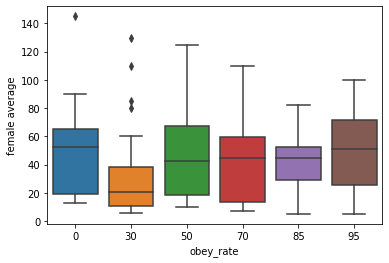

In [41]:
# Step 8a: Plot a boxplot of Female Average vs Obey_Rate
sns.boxplot(x='obey_rate', y='female average', data=M2) 
plt.show()

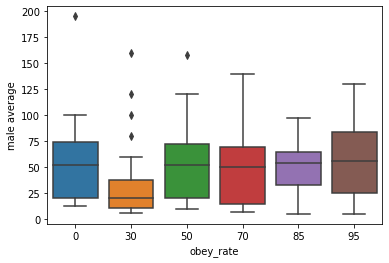

In [40]:
# Step 8b: Plot a boxplot of Male Average vs Obey_Rate
sns.boxplot(x='obey_rate', y='male average', data=M2) 
plt.show()

### Step 9: Plot a boxplot of Rank against Obey_Rate
<blockquote>Is there a correlation between a dog's popularity and its intelligence/Obey_Rate?</blockquote>
How about a dog's intelligence and its popularity? 

Again, we can investigate this with a boxplot and visually inspect any pattern that occurs. 

For convenience, you can use 2018 Rank. If you are curious, you can also plot other years' Rank and also stack all of the boxplots into a single plot. 

<font color = 'red'>Make sure you invert the y-axis so that the high ranks are on top of the graph rather at the bottom.</font>

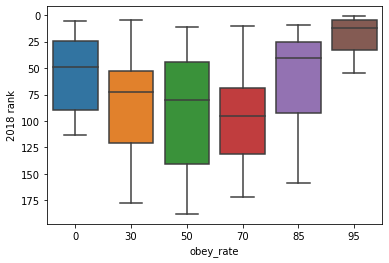

In [43]:
# Step 9: Plot a boxplot of Rank against Obey_Rate
barplot = sns.boxplot(x='obey_rate', y='2018 rank', data=M2) 
barplot.invert_yaxis()

### Step 10: Perform a groupby by Classification to get median values
Let's perform a groupby by "Classification", and get a DataFrame containing the median values of each column. 

You'll get something like this:

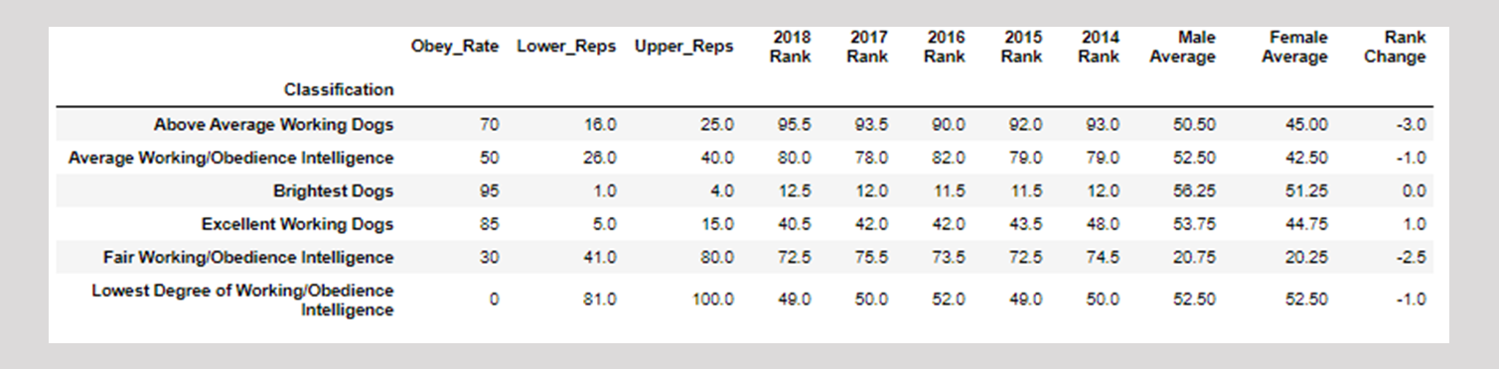

<strong>Hint: Useful resource - https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/</strong>

In [49]:
# Step 10: Perform a groupby using the "Classification" column and get the median values
M3 = M2.groupby(by='classification').median()
M3

,obey_rate,lower_reps,upper_reps,2018 rank,2017 rank,2016 rank,2015 rank,2014 rank,male average,female average,rank change
classification,,,,,,,,,,,
Above Average Working Dogs,70.0,16.0,25.0,95.5,93.5,90.0,92.0,93.0,50.50,45.00,-3.0
Average Working/Obedience Intelligence,50.0,26.0,40.0,80.0,78.0,82.0,79.0,79.0,52.50,42.50,-1.0
Brightest Dogs,95.0,1.0,4.0,12.5,12.0,11.5,11.5,12.0,56.25,51.25,0.0
Excellent Working Dogs,85.0,5.0,15.0,40.5,42.0,42.0,43.5,48.0,53.75,44.75,1.0
Fair Working/Obedience Intelligence,30.0,41.0,80.0,72.5,75.5,73.5,72.5,74.5,20.75,20.25,-2.5
Lowest Degree of Working/Obedience Intelligence,0.0,81.0,100.0,49.0,50.0,52.0,49.0,50.0,52.50,52.50,-1.0


### Step 11: Plot a scatter between 2018 rank and Obey_Rate
Let's plot a scatterplot between the rank in 2018 and the Obey_Rate of the different Classifications of dog breeds.

Don't forget to inverse the y-axis! 

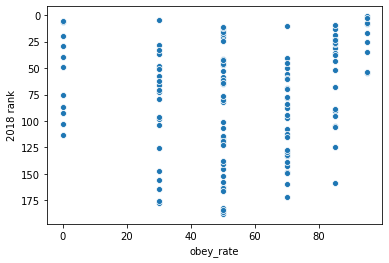

In [48]:
# Step 11: Plot a scatterplot between 2018 rank and Obey_Rate
sp = sns.scatterplot(x=M2['obey_rate'], y=M2['2018 rank'])
sp.invert_yaxis()
plt.show()

### Step 12: Fit a polynomial curve on the median ranks against Obey_Rate
Can we fit a graph based on the median of the breed ranks? 

Perform a polynomial fit using the median ranks and Obey_Rate in the groupby DataFrame from Step 10. Feel free to experiment with the number of powers.

If you do this right, this is what you'll see:

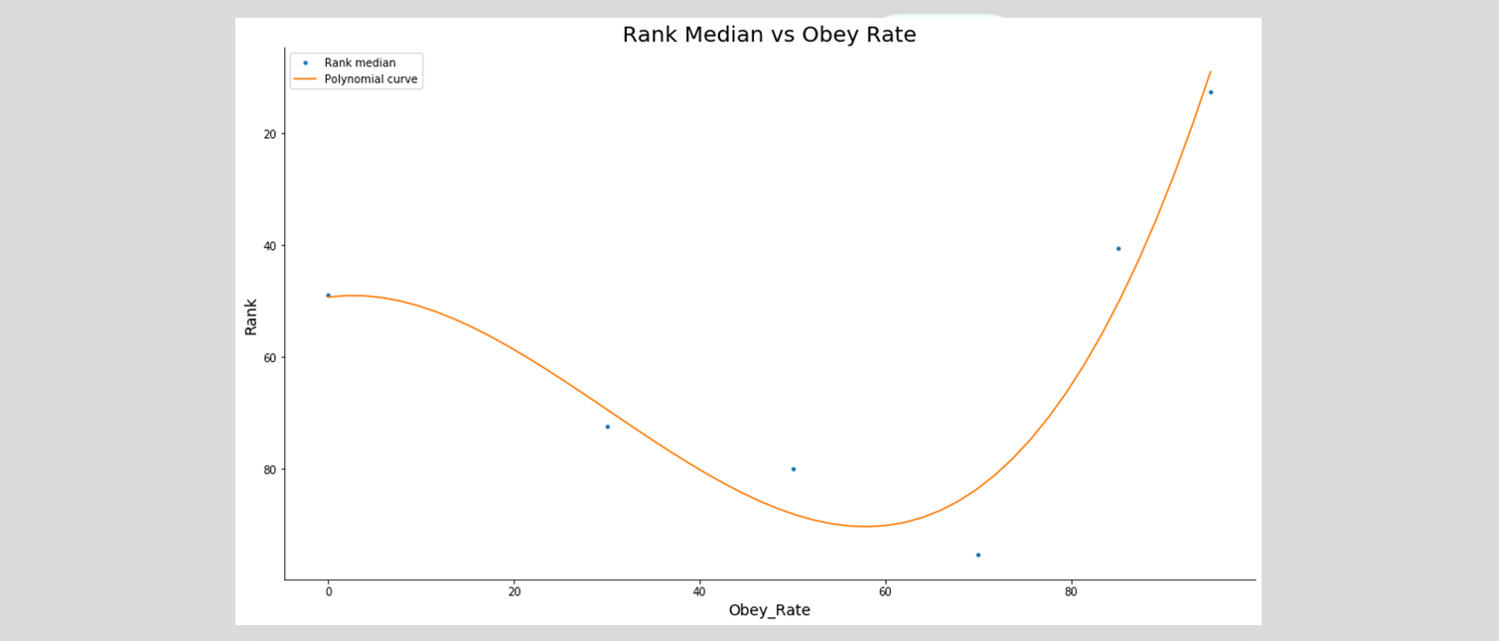

Again, don't forget to invert your y-axis so to place high ranks on the top.

After you perform fitting, think of why a pattern like this would happen! 

<strong>Hint: Google "fitting polynomial to data python". The official documentation is good too.</strong>

In [134]:
# Step 12a: Use numpy's polyfit method, followed by poly1d
Best_p = []
Best_res = []

for i in range(1,10):
    p, res, _, _, _ = np.polyfit(x=M3['obey_rate'], y=M3['2018 rank'], deg=i, full=True)
    print("deg:", i, "\n", "p:", p, "\n", "res:", res)
    if res and (not Best_res or res<Best_res):
        Best_p = p
        Best_res = res
        
z=np.poly1d(Best_p)

deg: 1 
 p: [-0.275      73.45833333] 
 res: [4073.33333333]
deg: 2 
 p: [-2.51362579e-02  2.14534671e+00  4.31884530e+01] 
 res: [956.69918994]
deg: 3 
 p: [-4.92149532e-04  4.46677948e-02 -2.26360233e-01  4.93194280e+01] 
 res: [332.57967607]
deg: 4 
 p: [-3.16369264e-07 -4.29418443e-04  4.07754433e-02 -1.52269213e-01
  4.92959692e+01] 
 res: [332.49083749]
deg: 5 
 p: [ 1.32495575e-06 -3.43702263e-04  3.14105447e-02 -1.19725712e+00
  1.66383036e+01  4.90000000e+01] 
 res: []
deg: 6 
 p: [ 8.09017894e-09 -1.34480330e-06 -2.49896580e-06  1.04225980e-02
 -5.80522554e-01  9.77884316e+00  4.90000000e+01] 
 res: []
deg: 7 
 p: [ 5.35007558e-11 -5.59968283e-09 -3.96986851e-07  2.59469223e-05
  4.21388747e-03 -3.23593094e-01  6.41669011e+00  4.90000000e+01] 
 res: []
deg: 8 
 p: [ 3.76768163e-13 -2.32459651e-11 -3.26686093e-09 -7.57112050e-08
  2.17354177e-05  1.95415965e-03 -2.00325988e-01  4.59693018e+00
  4.90000000e+01] 
 res: []
deg: 9 
 p: [ 2.79168528e-15 -8.51738059e-14 -2.17737172e

<ipython-input-134-b94a5d59af8c>:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if res and (not Best_res or res<Best_res):


In [135]:
# Step 12b: Create an array containing numbers between the min and max values of Obey_Rate
xp = np.linspace(min(M2['obey_rate']), max(M2['obey_rate']), max(M2['obey_rate'])-min(M2['obey_rate'])+1)

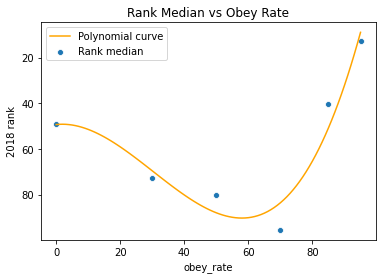

In [159]:
# Step 12c: Plot your scatterplot containing 2018 Rank against Obey_Rate, and the polynomial curve
MedPlt = sns.lineplot(x=xp, y=z(xp), color='orange')
MedPlt = sns.scatterplot(x=M3['obey_rate'], y=M3['2018 rank'])
MedPlt.invert_yaxis()
MedPlt.set(title = 'Rank Median vs Obey Rate')
MedPlt.legend(['Polynomial curve','Rank median'])
plt.show()

# The end
And that concludes our project series! To recap, you have:
1. Independently obtain data from multiple sources
2. Cleaned, formatted, and combined these disparate pieces of data into a coherent whole
3. Engineered additional features based on understanding of the data

While the dataset was small, the skills you learn and the practice you get are the real deal. Data cleaning is a tough skill to learn in a classroom, and we hope that this project exposed you to the mindset required behind data cleaning. 

You have also successfully investigated the relationship between different features, and assessed hypotheses behind the relationship between intelligence, size, and popularity of dog breeds.

Whatever you learn here is but a tip of the iceberg, and launchpad for bigger and better things to come. Come join us in our Telegram community over at https://bit.ly/UpLevelSG and our Facebook page at https://fb.com/UpLevelSG